<a href="https://colab.research.google.com/github/skywalker0803r/Calculus/blob/master/%E8%9E%BA%E6%97%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

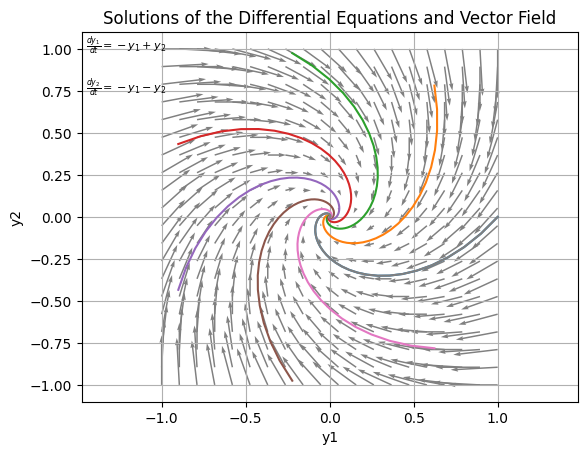

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 定义微分方程组
def equations(y1, y2):
    y1_prime = -y1 + y2
    y2_prime = -y1 - y2
    return y1_prime, y2_prime

# 定义Euler方法
def euler_method(y1, y2, h):
    y1_prime, y2_prime = equations(y1, y2)
    y1_new = y1 + h * y1_prime
    y2_new = y2 + h * y2_prime
    return y1_new, y2_new

# 初始条件：在半径为1的圆周上均匀分布8个点
theta = np.linspace(0, 2*np.pi, 8)
initial_conditions = np.array([(np.cos(t), np.sin(t)) for t in theta])

# 模拟时间步长
h = 0.1
num_steps = 100

# 模拟微分方程的解
for y1_0, y2_0 in initial_conditions:
    y1_values, y2_values = [y1_0], [y2_0]
    for _ in range(num_steps):
        y1_0, y2_0 = euler_method(y1_0, y2_0, h)
        y1_values.append(y1_0)
        y2_values.append(y2_0)
    plt.plot(y1_values, y2_values)

# 绘制向量场
y1, y2 = np.meshgrid(np.linspace(-1.0, 1.0, 20), np.linspace(-1.0, 1.0, 20))
y1_prime, y2_prime = equations(y1, y2)
plt.quiver(y1, y2, y1_prime, y2_prime, color='gray', scale=20)

# 绘制圆周
#circle = plt.Circle((0, 0), 1, color='black', fill=False)
#plt.gca().add_patch(circle)

# 添加方程组文本
plt.text(-1.45, 1.0, r'$\frac{dy_1}{dt} = -y_1 + y_2$', fontsize=8, color='black')
plt.text(-1.45, 0.75, r'$\frac{dy_2}{dt} = -y_1 - y_2$', fontsize=8, color='black')

# 设置图形参数
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Solutions of the Differential Equations and Vector Field')
plt.grid(True)
plt.axis('equal')

# 显示图形
plt.show()

#繪製方程組y1'=-y1+y2,y2'=-y1-y2的圖形,圖形兩個座標分別為y1,y2,使用Euler方法模擬這個微分方程組的解,圍繞座標(0,0)半徑為1的圓均勻散佈8個初始條件座標求解並繪製

#把向量場也繪製出來(繪製在同一張圖中)

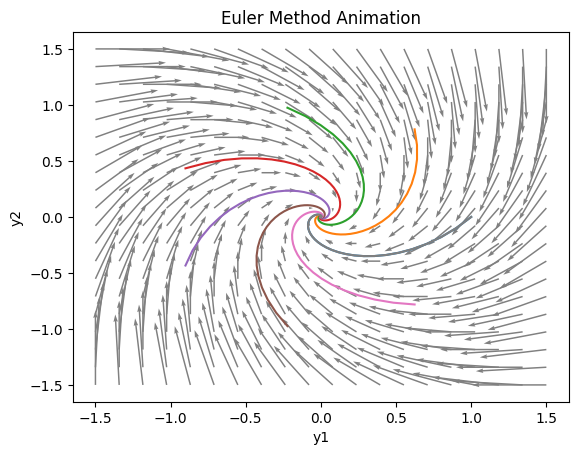

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 定义微分方程组
def equations(y1, y2):
    y1_prime = -y1 + y2
    y2_prime = -y1 - y2
    return y1_prime, y2_prime

# 定义Euler方法
def euler_method(y1, y2, h):
    y1_prime, y2_prime = equations(y1, y2)
    y1_new = y1 + h * y1_prime
    y2_new = y2 + h * y2_prime
    return y1_new, y2_new

# 初始条件：在半径为1的圆周上均匀分布8个点
theta = np.linspace(0, 2*np.pi, 8)
initial_conditions = np.array([(np.cos(t), np.sin(t)) for t in theta])

# 模拟时间步长
h = 0.1
num_steps = 100

# 设置图形
fig, ax = plt.subplots()
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_title('Euler Method Animation')

# 绘制圆周
#circle = plt.Circle((0, 0), 1, color='black', fill=False)
#ax.add_patch(circle)

# 绘制向量场
y1, y2 = np.meshgrid(np.linspace(-1.5, 1.5, 20), np.linspace(-1.5, 1.5, 20))
y1_prime, y2_prime = equations(y1, y2)
ax.quiver(y1, y2, y1_prime, y2_prime, color='gray', scale=20)

# 初始化函数
def init():
    return []

# 更新函数
def update(frame):
    ax.clear()
    ax.set_xlabel('y1')
    ax.set_ylabel('y2')
    ax.set_title('Euler Method Animation')
    #ax.add_patch(circle)
    ax.quiver(y1, y2, y1_prime, y2_prime, color='gray', scale=20)

    for y1_0, y2_0 in initial_conditions:
        y1_values, y2_values = [y1_0], [y2_0]
        for _ in range(frame):
            y1_0, y2_0 = euler_method(y1_0, y2_0, h)
            y1_values.append(y1_0)
            y2_values.append(y2_0)
        ax.plot(y1_values, y2_values)

# 制作动画
#有辦法把他變成動畫嗎?根據Euler方法在num_steps每個step都當作一偵製作動畫
ani = FuncAnimation(fig, update, frames=num_steps, init_func=init, blit=False, repeat=False)
ani.save('fig.gif')
plt.show()
